In [1]:
import re
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [2]:
train = pd.read_csv('/home/admin1/Downloads/machine_learning/week13/twitter-sentiment-analysis/train_E6oV3lV.csv')
test = pd.read_csv('/home/admin1/Downloads/machine_learning/week13/twitter-sentiment-analysis/test_tweets_anuFYb8.csv')

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [5]:
train.shape

(31962, 3)

In [6]:
test.shape

(17197, 2)

# Checking wheteher dataset train is balanced or unbalanced

In [102]:
positive = train['label'].value_counts()[0]
negative = train['label'].value_counts()[1]

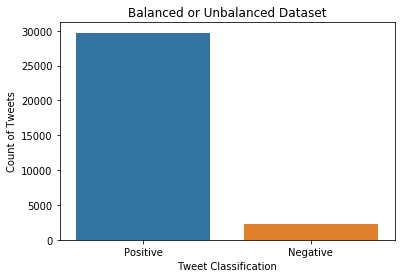

In [103]:
sb.barplot(['Positive','Negative'],[positive,negative])
plt.xlabel('Tweet Classification')
plt.ylabel('Count of Tweets')
plt.title('Balanced or Unbalanced Dataset')
plt.show()

In [105]:
print('No of Tweets labelled as Positive:',positive)
print('No of Tweets labelled as Negative:',negative)

No of Tweets labelled as Positive: 29720
No of Tweets labelled as Negative: 2242


We can see that dataset is higly imbalanced

# Removing punctuations and other special characters

The tweets contain lots of twitter handles (@user), that is how a Twitter user acknowledged on Twitter. 
Remove all these twitter handles from the data as they don’t convey much information.

In [7]:
corpus_train  = [ ]
corpus_test = [ ]

In [8]:
stop_words = stopwords.words('english')

In [9]:
words = ['user', 'run', 'u', 'ur', 'rd', 'th','shouldnot','couldnot', 'didnot', 'would', "who's", "where's"
        "why's", "when's", "what's"]
stop_words.extend(words)

# For Train Dataset

In [10]:
for i in range(0, 31962):
    a = re.sub('[^a-zA-Z]', ' ', train['tweet'][i]).strip()
    a = a.lower()
    tweets = re.sub('\s+', ' ', a, flags= re.UNICODE) #Remove inbetween spaces within words
    tweets = word_tokenize(tweets)
    stemmer = SnowballStemmer('english')
    tweets = [stemmer.stem(w) for w in tweets if w not in stop_words]
    tweets = ' '.join(tweets)
    
    
    corpus_train.append(tweets)

In [11]:
len(corpus_train)

31962

# For Test Dataset

In [12]:
for i in range(0, 17197):
    a = re.sub('[^a-zA-Z]', ' ', test['tweet'][i]).strip()
    a = a.lower()
    tweets = re.sub('\s+', ' ', a, flags= re.UNICODE) #Remove inbetween spaces within words
    tweets = word_tokenize(tweets)
    stemmer = SnowballStemmer('english')
    tweets = [stemmer.stem(w) for w in tweets if w not in stop_words]
    tweets = ' '.join(tweets)
    
    
    corpus_test.append(tweets)

In [13]:
len(corpus_test)

17197

# Bag of words

In [83]:
cv = CountVectorizer(max_df=0.90, min_df = 2, max_features = 7000)

In [84]:
X = cv.fit_transform(corpus_train).toarray()

In [85]:
X.shape

(31962, 7000)

In [86]:
y = train.iloc[:,1:2].values

In [87]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Using Naive Bayes Classifier

In [88]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [89]:
score = f1_score(y_test, y_pred)
score

0.28412537917087965

In [90]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[4696, 1289],
       [ 127,  281]])

In [91]:
from sklearn.metrics import accuracy_score

In [92]:
acc = accuracy_score(y_test, y_pred)
acc

0.7785077428437354

# Using Logistic Regression

In [93]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

In [94]:
score = f1_score(y_test, y_pred_lr)
score

0.6163141993957705

In [95]:
cm = confusion_matrix(y_test, y_pred_lr)
cm

array([[5935,   50],
       [ 204,  204]])

In [96]:
acc = accuracy_score(y_test, y_pred_lr)
acc

0.9602690442671672

# Predicting for the Test Dataset using Logistic Regression

In [97]:
x = cv.transform(corpus_test).toarray()

In [98]:
x.shape

(17197, 7000)

In [99]:
y_pred_test = lr.predict(X)

In [100]:
y_pred_test

array([0, 0, 0, ..., 0, 1, 0])